

# *Problem Statement*
*HELP International*-> is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

Business Goal ->The job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

# Importing libraries

In [634]:
# data analysis
import pandas as pd
import numpy as np

#data viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact

#clustering viz
from yellowbrick.cluster import (KElbowVisualizer,
                                 SilhouetteVisualizer,
                                 InterclusterDistance,
                                 kelbow_visualizer,
                                 silhouette_visualizer)

# Machine Learning clustering
from sklearn.mixture import GaussianMixture

from sklearn.cluster import (KMeans,
                             DBSCAN,
                             MeanShift,
                             AgglomerativeClustering,
                             estimate_bandwidth)

from sklearn.metrics import (silhouette_score,
                             davies_bouldin_score,
                             calinski_harabasz_score)


from scipy.cluster.hierarchy import (linkage,
                                     dendrogram,
                                     fcluster)


from sklearn.preprocessing import scale

#Reduce Dimension

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#warnings

import warnings

warnings.filterwarnings("ignore")

## Seaborn theme

In [635]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)



# Importing Dataset

In [636]:
#dictionary
dict=pd.read_csv("/content/data-dictionary.csv")
dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [637]:
#extrating the dataframe
df=pd.read_csv("/content/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [638]:
#spliting the column coutry for future usage
df_country=df["country"]

#Data Understanding

In [639]:
# determine numerical columns and categorical columns

num_col=df.select_dtypes("number").columns
cat_col=[col for col in df.columns if col not in num_col]


## Shape and info

In [640]:
print(f"The dataframe has {df.shape[0]} lines and { df.shape[1]} columns")

The dataframe has 167 lines and 10 columns


In [641]:
#showing the types and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Unique values

In [642]:
#unique values
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

## Missing Values and duplicated

In [643]:
 #no missing number
 df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [644]:
#no value duplicated
df.duplicated().sum()

0

## Estatistics distribution and visualization

In [645]:
# dataset distribution

percentiles= df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99]).T

percentiles.round(3)

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
child_mort,167.0,38.270,40.329,2.600,2.800,4.200,8.250,19.30,62.10,100.220,153.400,208.00
exports,167.0,41.109,27.412,0.109,3.909,15.660,23.800,35.00,51.35,70.800,160.480,200.00
health,167.0,6.816,2.747,1.810,2.122,3.726,4.920,6.32,8.60,10.940,13.474,17.90
imports,167.0,46.890,24.210,0.066,12.988,22.520,30.200,43.30,58.75,75.420,146.080,174.00
income,167.0,17144.689,19278.068,609.000,742.240,1524.000,3355.000,9960.00,22800.00,41220.000,84374.000,125000.00
inflation,167.0,7.782,10.571,-4.210,-2.349,0.588,1.810,5.39,10.75,16.640,41.478,104.00
life_expec,167.0,70.556,8.893,32.100,47.160,57.820,65.300,73.10,76.80,80.400,82.370,82.80
total_fer,167.0,2.948,1.514,1.150,1.243,1.452,1.795,2.41,3.88,5.322,6.564,7.49
gdpp,167.0,12964.156,18328.705,231.000,331.620,593.800,1330.000,4660.00,14050.00,41840.000,79088.000,105000.00


In [646]:
# correlation
corr=df.corr()
corr.style.background_gradient(cmap="YlGnBu")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


## Heatmap

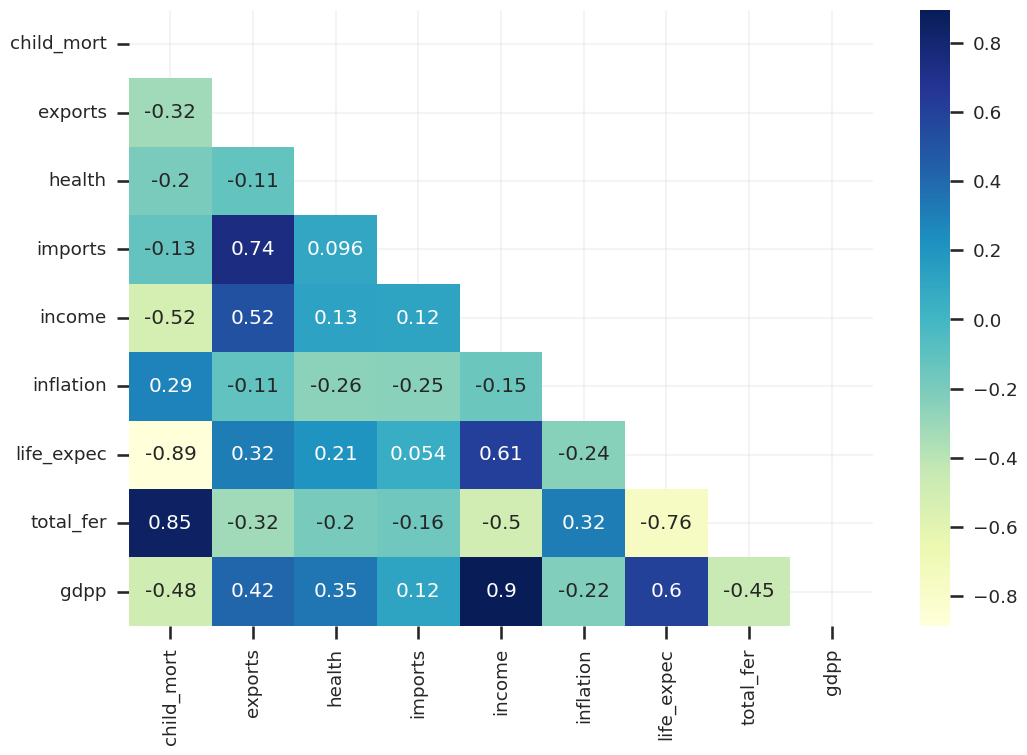

In [647]:
#creating mask for visualization

mask=np.triu(np.ones_like(corr))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True)
plt.show()

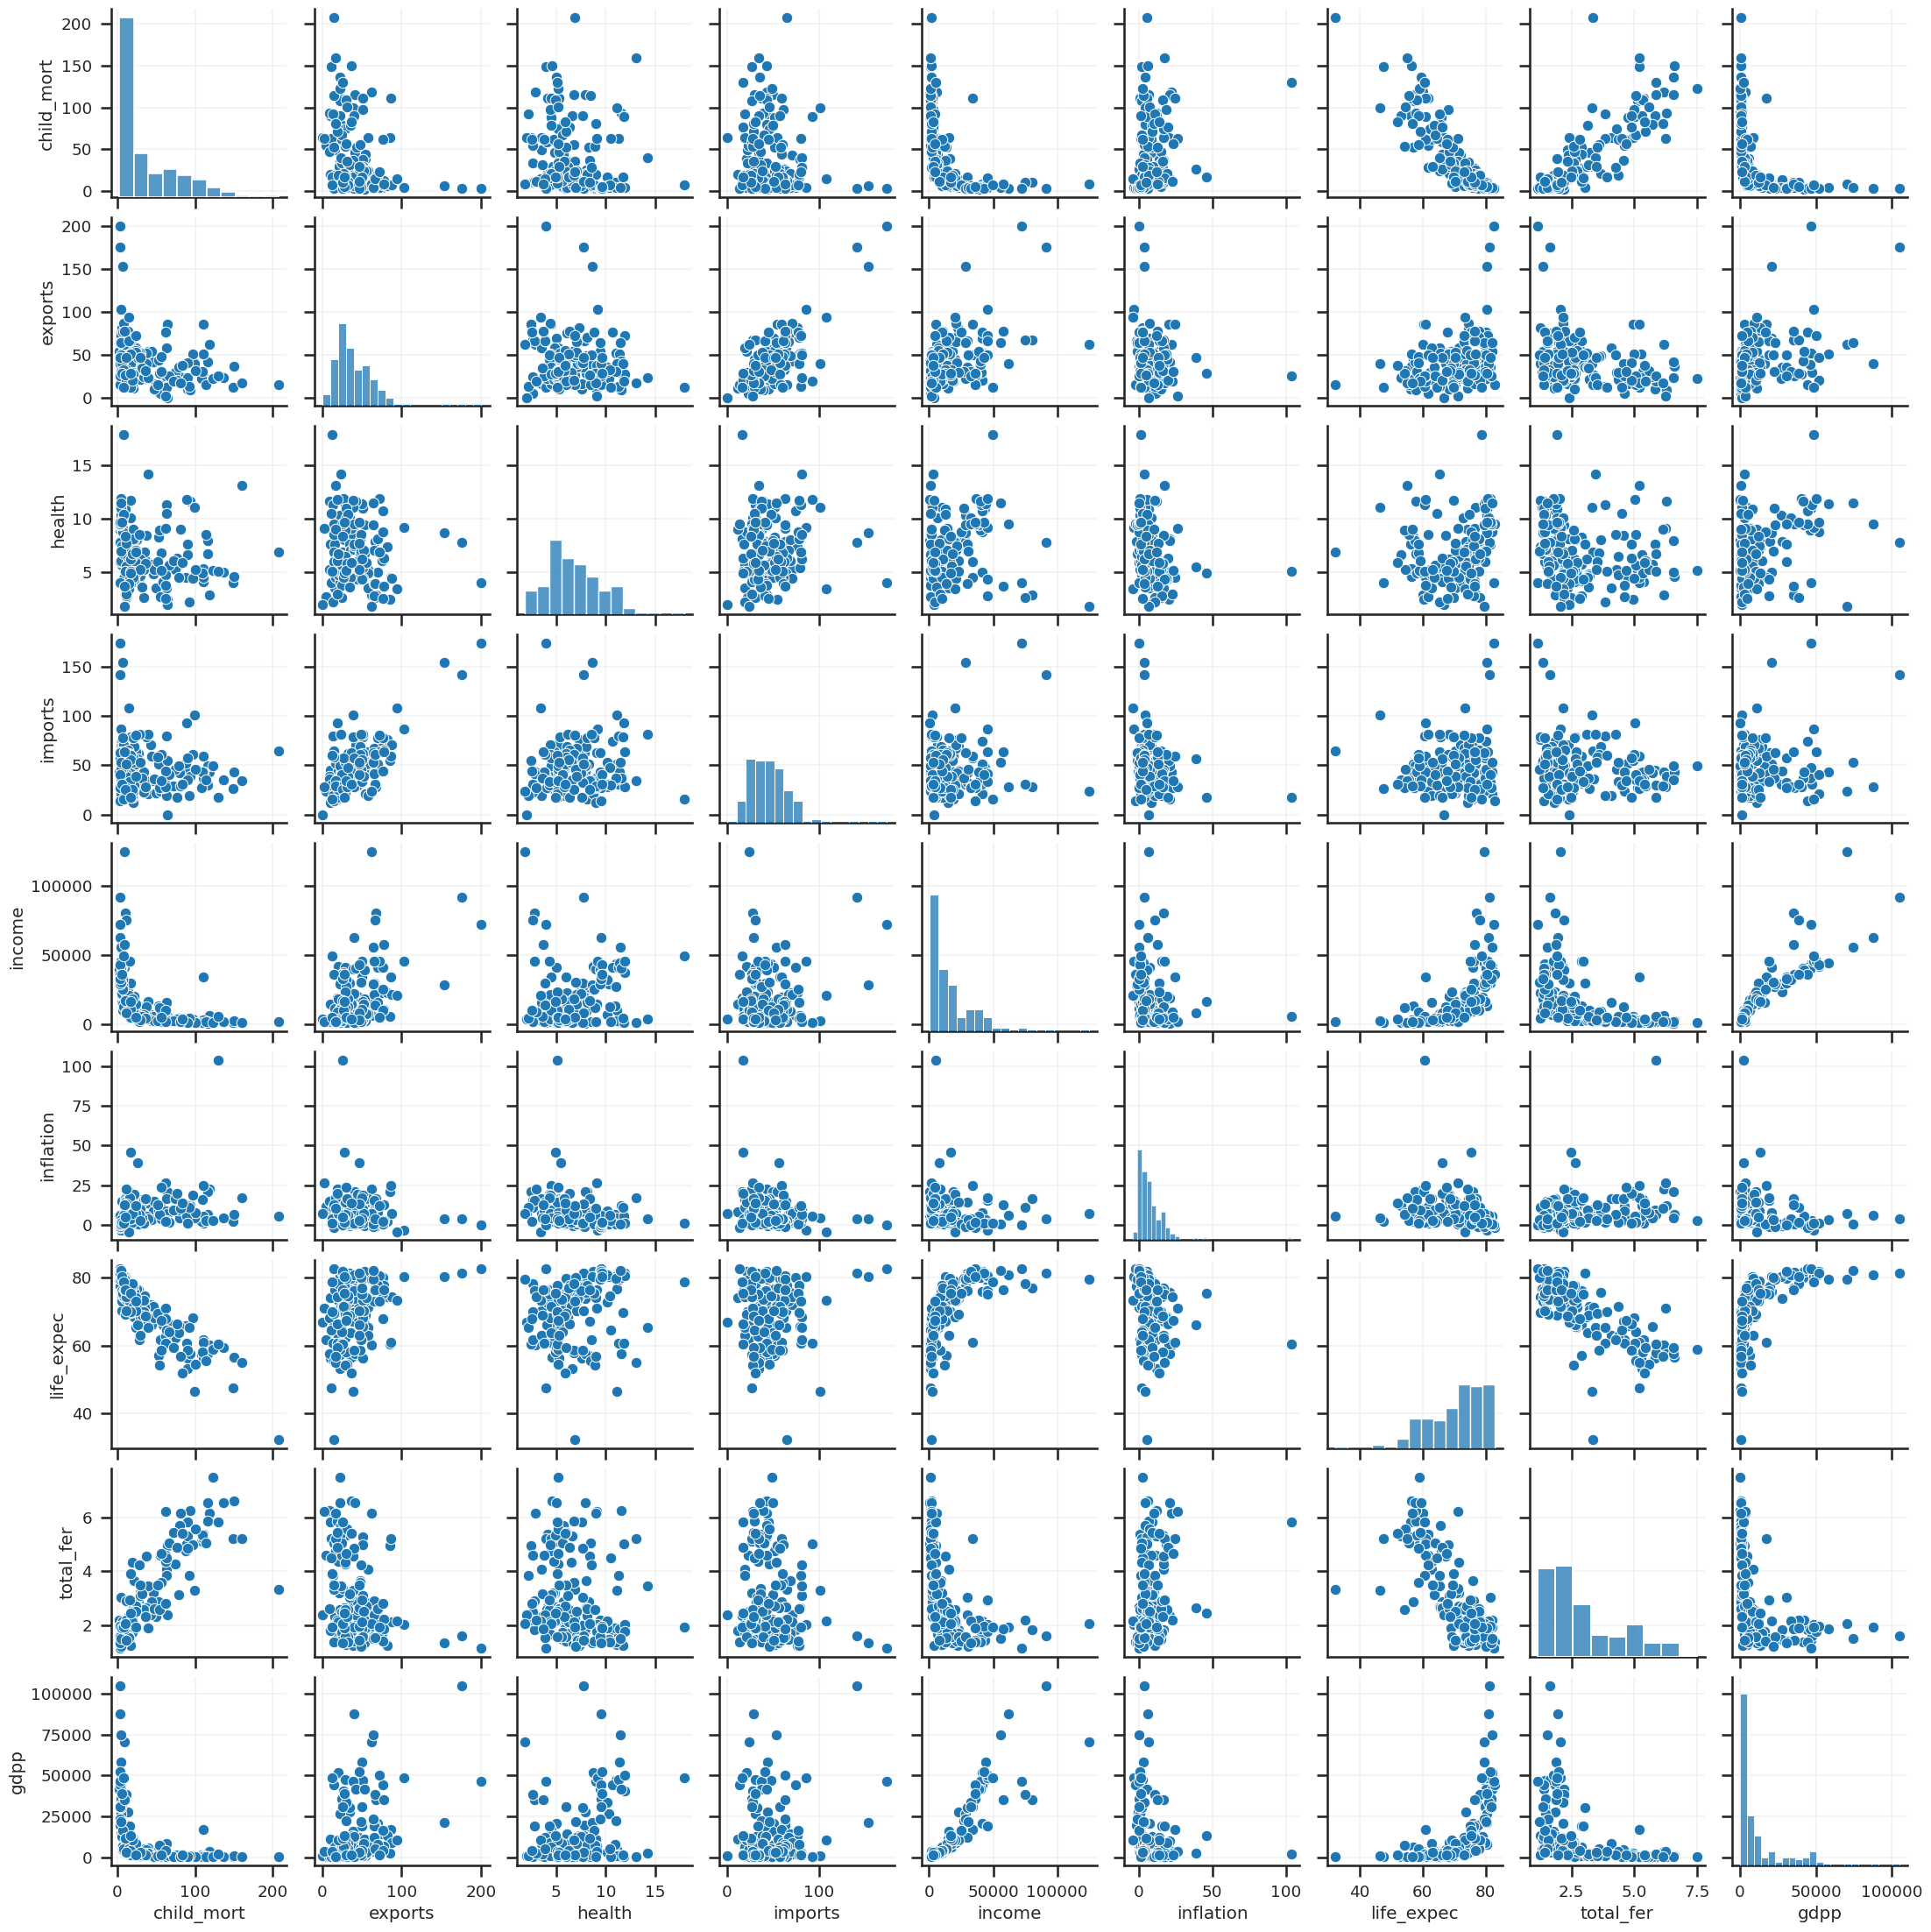

In [648]:
#distribution of the dataset
sns.pairplot(data=df)
plt.show()

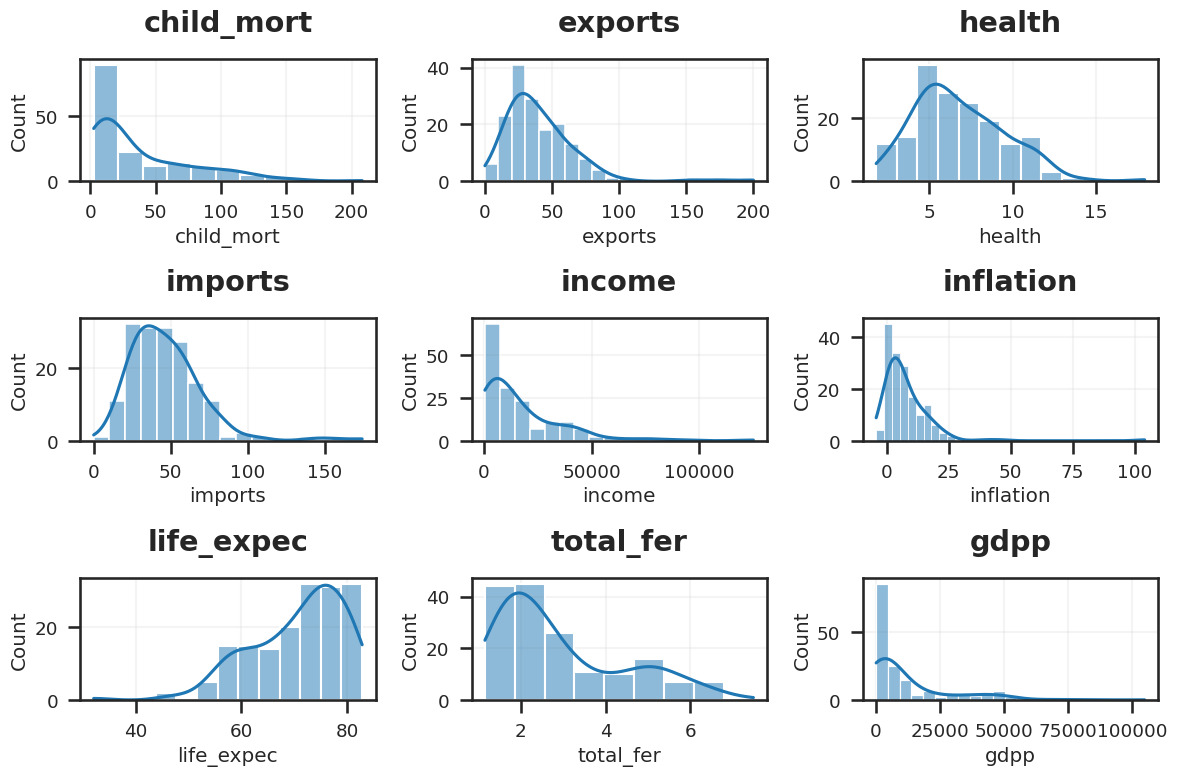

In [649]:
#histogram and kde
for i , num in enumerate(num_col):
    ax=plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=num, kde=True)
    plt.title(num)
    plt.tight_layout()

## Boxplot data viz

<Axes: >

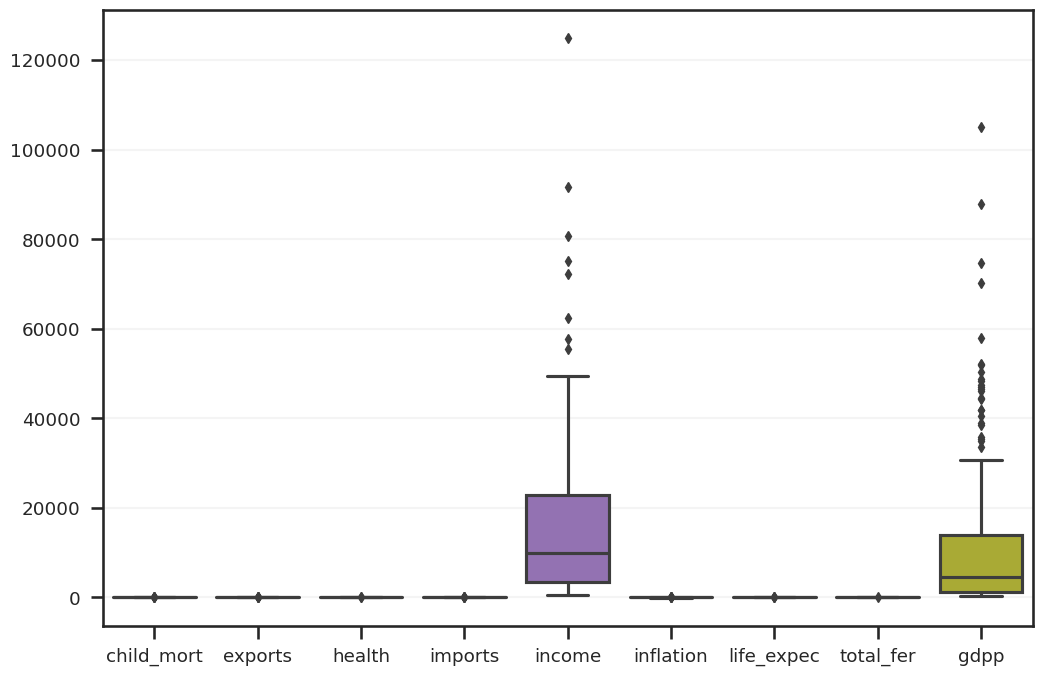

In [650]:
# boxplot for data distribution
sns.boxplot(df)

In [651]:
#applying scale to show better the datas
df1=df.set_index("country")
df_scaled=df1.apply(scale)

Text(0.5, 1.0, 'Boxplot Distribution')

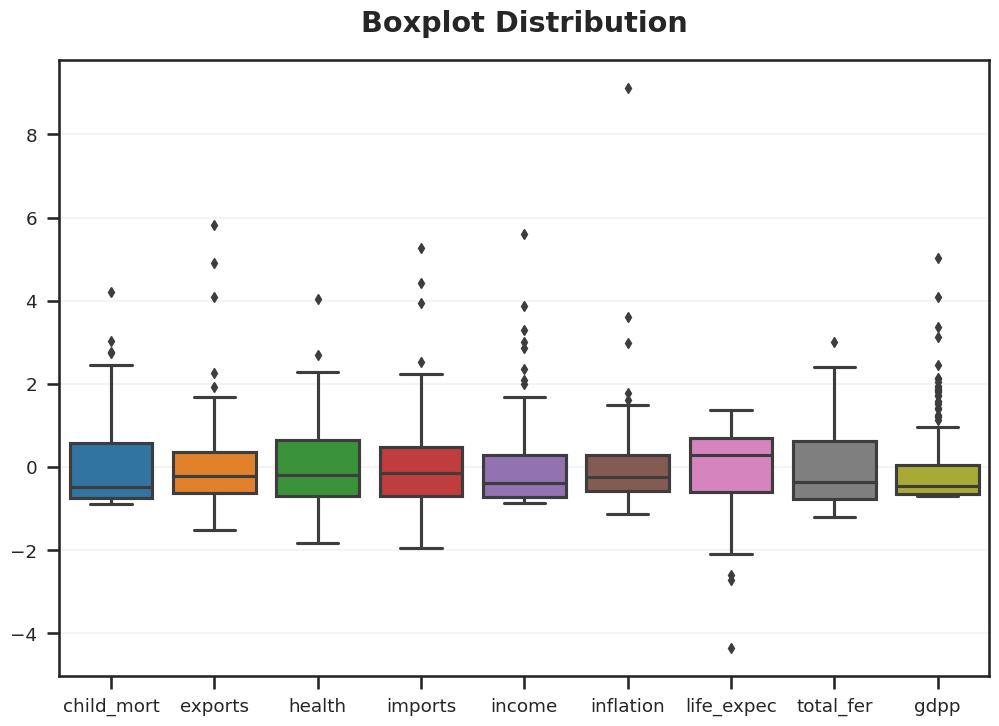

In [652]:
#boxplot for scaled date
sns.boxplot(df_scaled)
plt.title("Boxplot Distribution")

In [653]:
df_scaled.loc[(df_scaled["inflation"] > 3 )| (df_scaled["life_expec"] < -3)]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Haiti,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215
Nigeria,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323


# Data Preparation


## Transform the columns that show in % to absulute number (import, export, health)

In [654]:
'''Once the health / exports / imports are shown in relatives numbers,
some countries with GDP x health are almost similar, so scaling them to
absolute number is a better way to show the difference between the cuontries'''

def absolute(df:pd.DataFrame)->pd.DataFrame:
    df["health"]=(df["health"]* df["gdpp"]/100).round(2)
    df["exports"]=(df["exports"] * df["gdpp"]/100).round(2)
    df["imports"]=(df["imports"] * df["gdpp"]/100).round(2)
    df=df.set_index("country")
    return df

df= absolute(df)



In [655]:
df.head(25)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553
Albania,16.6,1145.20,267.90,1987.74,9930,4.490,76.3,1.65,4090
Algeria,27.3,1712.64,185.98,1400.44,12900,16.100,76.5,2.89,4460
Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.440,76.8,2.13,12200
Argentina,14.5,1946.70,834.30,1648.00,18700,20.900,75.8,2.37,10300
Armenia,18.1,669.76,141.68,1458.66,6700,7.770,73.3,1.69,3220
Australia,4.8,10276.20,4530.87,10847.10,41400,1.160,82.0,1.93,51900
Austria,4.3,24059.70,5159.00,22418.20,43200,0.873,80.5,1.44,46900


## Scaling and clipping the DF

In [656]:
df1_scaled=df.apply(scale)

In [657]:
#clipping the dataframe
df_clip_scaled=df1_scaled.apply(lambda x: x.clip(upper=x.quantile(0.99) , lower=x.quantile(0.01)))

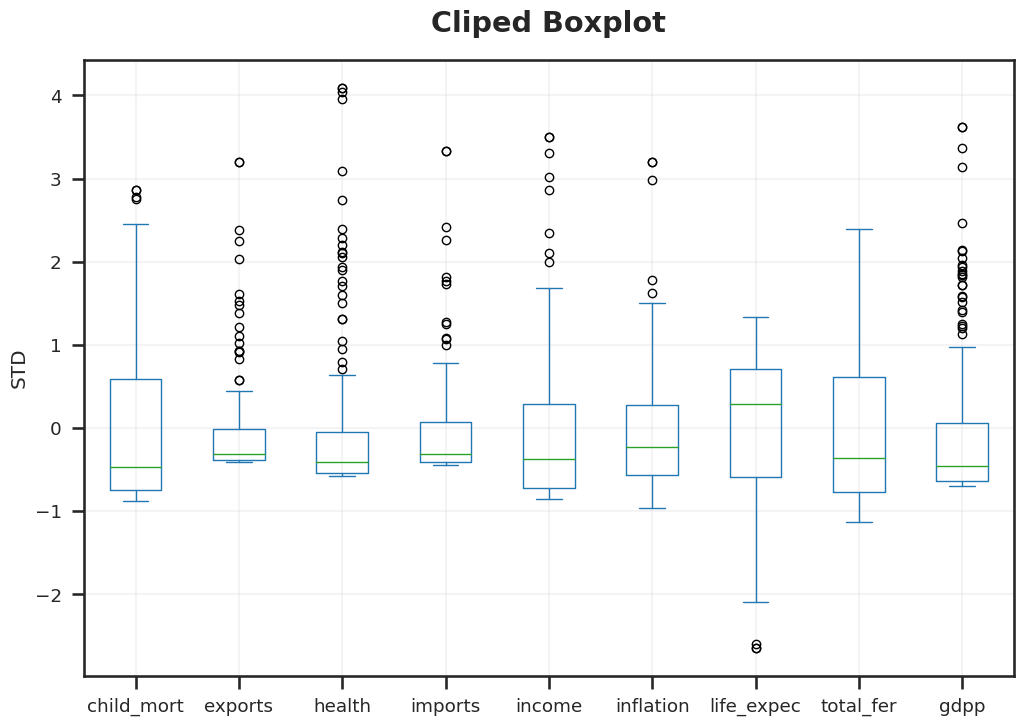

In [658]:
# ploting the cliped dataframe
df_clip_scaled.plot.box()
plt.title("Cliped Boxplot")
plt.ylabel("STD")
plt.show()

# Modeling


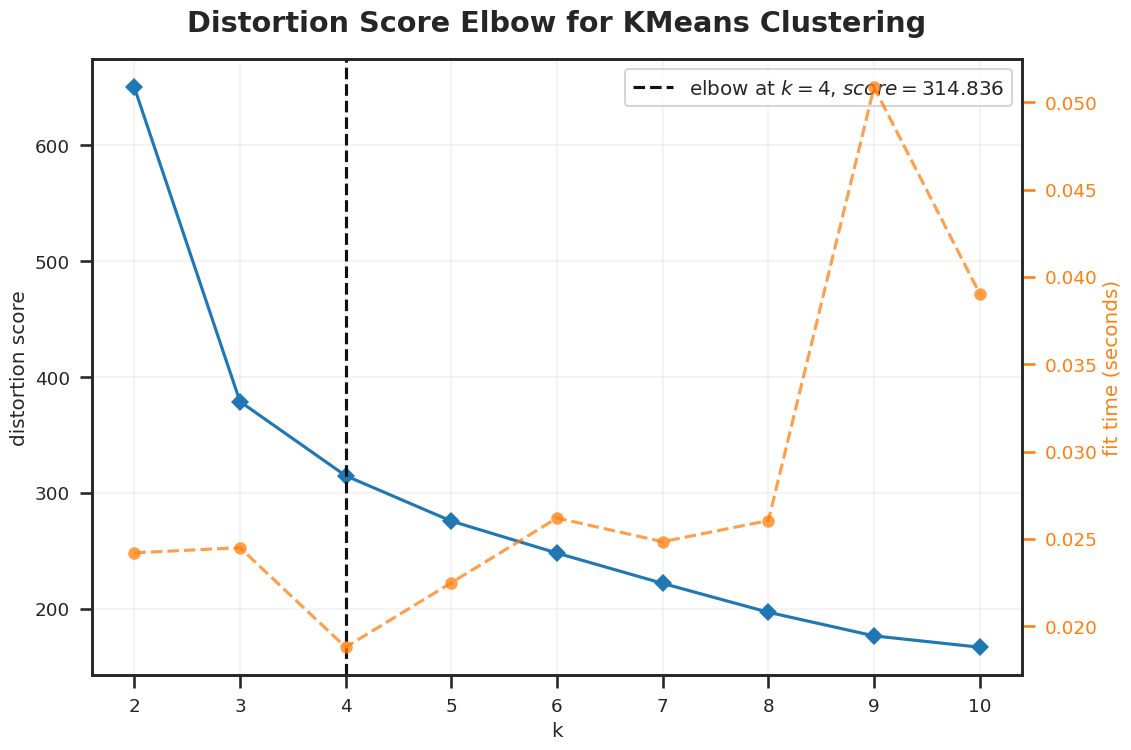

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10))

In [659]:
# Analyzing the best K using yellowbrick
kelbow_visualizer(KMeans(), df_clip_scaled, k= 10)

In [660]:
cluster_metrics= silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results=[]
x=df_clip_scaled
#cluster_results_dict["inertia"]= model.inertia_
for k in range (2,11):
  model=KMeans(n_clusters=k, random_state=0)
  labels=model.fit_predict(x)
  cluster_results_dict={"k": k}
  cluster_results_dict["inertia"]=model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__]= metric(x, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

pd.DataFrame(cluster_metrics_results).set_index("k").style.background_gradient(axis=0)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,650.270919,0.462064,0.875202,129.692796
3,378.883682,0.440034,0.799939,169.355191
4,314.836187,0.401606,0.968044,146.096153
5,275.889653,0.299120,1.118012,129.990238
6,247.303825,0.314827,1.099289,119.018507
7,225.159433,0.294311,1.104050,110.882668
8,198.163083,0.318095,1.076517,110.409678
9,183.786711,0.308466,0.985658,105.055264
10,168.532777,0.267311,1.050522,102.768898


In [661]:
modelkmean=KMeans(4, random_state=101).fit(df_clip_scaled)


In [662]:
centers1=modelkmean.cluster_centers_
labels=modelkmean.labels_

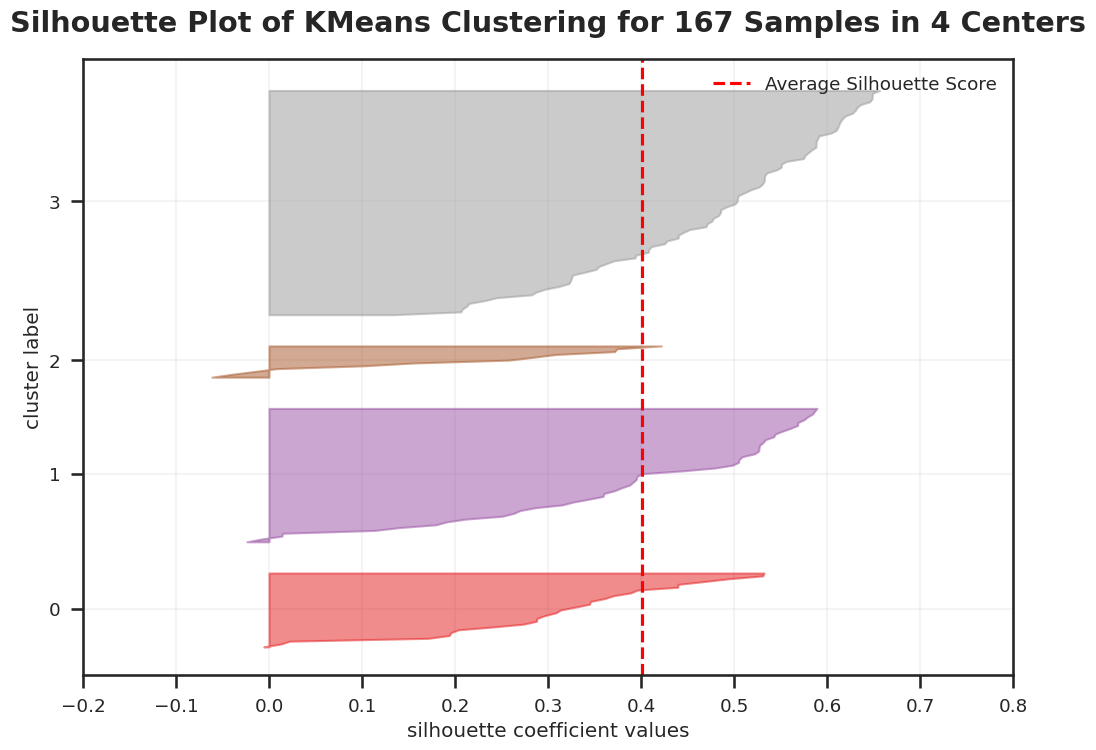

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4, random_state=101))

In [663]:
silhouette_visualizer(modelkmean, x)

In [664]:
df_labels=(pd.DataFrame(labels))
df_labels.columns=["labels"]

In [665]:
round(df_labels.value_counts().div(len(df))*100 ,2)

labels
3         47.90
1         28.74
0         16.17
2          7.19
dtype: float64

In [666]:
df=df.reset_index()

In [667]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [668]:
df_final=pd.concat([df, df_labels], axis=1)



## PCA

In [669]:
 # Apply PCA
pca=PCA(random_state=101)
pca_components=pca.fit_transform(df_clip_scaled)


In [670]:
df_pca= pd.DataFrame(pca_components,columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

In [671]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.778902,1.303943,-0.229206,-0.009362,-0.183324,0.007542,0.423175,-0.014756,0.014982
1,0.146305,-1.443139,-0.179353,0.001210,-0.009530,-0.045096,-0.256088,-0.007734,-0.028111
2,-0.327910,-0.811785,0.896344,-0.254945,-0.380239,-0.088118,-0.215201,-0.048427,-0.024278
3,-2.893202,1.872602,0.966922,-0.234631,-0.307683,-0.076343,-0.302938,0.004886,0.040167
4,0.756736,-0.897952,-0.326929,0.181716,-0.303424,0.034657,-0.008471,-0.023726,0.084041
...,...,...,...,...,...,...,...,...,...
162,-1.155960,-0.349643,-0.614786,0.114616,0.097663,-0.108169,0.693958,0.094785,-0.020829
163,-0.078097,-0.505967,3.150813,-0.832075,0.358784,-0.406218,-0.076099,0.235069,0.052543
164,-0.445121,-1.270470,0.378985,-0.151719,0.220124,-0.279462,-0.167373,0.061661,-0.062223
165,-1.792378,0.274378,1.282716,-0.470918,-0.332287,-0.303513,0.117015,0.009297,0.001558


In [672]:
pd.concat([df_country,df_pca], axis=1)

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,Afghanistan,-2.778902,1.303943,-0.229206,-0.009362,-0.183324,0.007542,0.423175,-0.014756,0.014982
1,Albania,0.146305,-1.443139,-0.179353,0.001210,-0.009530,-0.045096,-0.256088,-0.007734,-0.028111
2,Algeria,-0.327910,-0.811785,0.896344,-0.254945,-0.380239,-0.088118,-0.215201,-0.048427,-0.024278
3,Angola,-2.893202,1.872602,0.966922,-0.234631,-0.307683,-0.076343,-0.302938,0.004886,0.040167
4,Antigua and Barbuda,0.756736,-0.897952,-0.326929,0.181716,-0.303424,0.034657,-0.008471,-0.023726,0.084041
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-1.155960,-0.349643,-0.614786,0.114616,0.097663,-0.108169,0.693958,0.094785,-0.020829
163,Venezuela,-0.078097,-0.505967,3.150813,-0.832075,0.358784,-0.406218,-0.076099,0.235069,0.052543
164,Vietnam,-0.445121,-1.270470,0.378985,-0.151719,0.220124,-0.279462,-0.167373,0.061661,-0.062223
165,Yemen,-1.792378,0.274378,1.282716,-0.470918,-0.332287,-0.303513,0.117015,0.009297,0.001558


In [673]:
# Verify explained variance
var=pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

In [674]:
var=var.reset_index()

In [675]:
var.round(2)

,index,explained_var,explained_var_cumsum
0,PC1,0.66,0.66
1,PC2,0.18,0.83
2,PC3,0.07,0.90
3,PC4,0.04,0.94
4,PC5,0.02,0.97
5,PC6,0.02,0.98
6,PC7,0.01,1.00
7,PC8,0.00,1.00
8,PC9,0.00,1.00


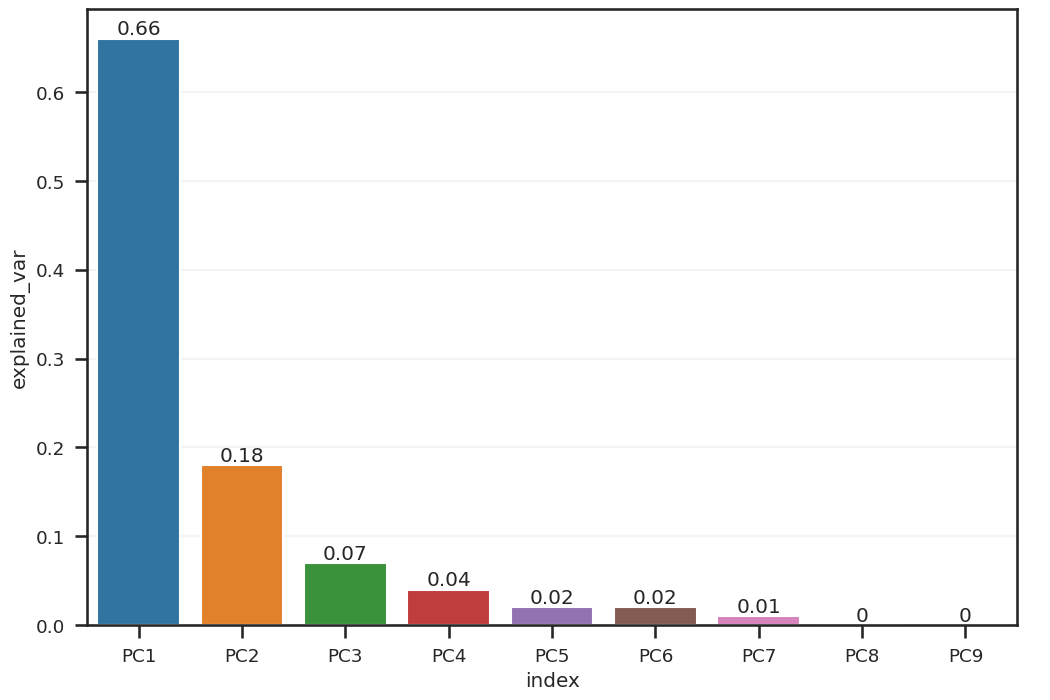

In [676]:
ax=sns.barplot(data=var.round(2), x="index" , y="explained_var")
for label in ax.containers:
  ax.bar_label(label)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.show()



Text(0, 0.5, '%')

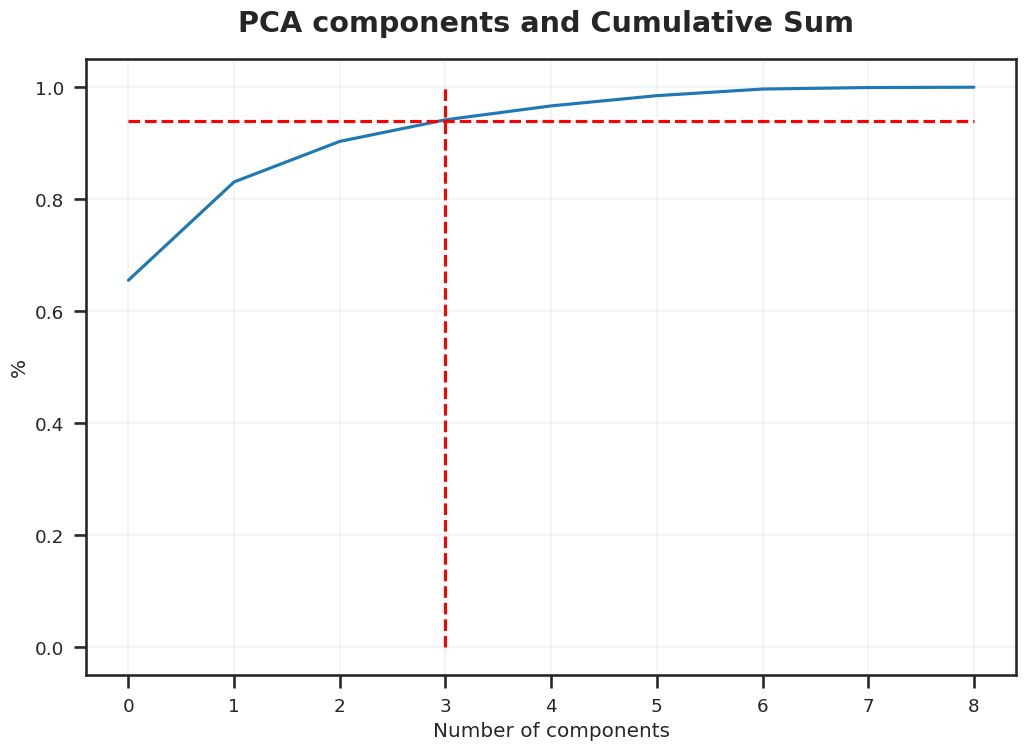

In [677]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymin=0, ymax=1, color="red",linestyles="--")
plt.hlines(y=0.94, xmin=0, xmax=8, color="red", linestyles="--" )
plt.title("PCA components and Cumulative Sum ")
plt.xlabel("Number of components")
plt.ylabel("%")

In [678]:
kmeans=KMeans(4, random_state=101).fit(df_pca.iloc[:,:4])

In [679]:
centroids=kmeans.cluster_centers_
labels_pca=kmeans.labels_

In [680]:
centers=pd.DataFrame(centroids, columns=df_pca.iloc[:,:4].columns)

In [681]:
centers

,PC1,PC2,PC3,PC4
0,4.977541,2.160811,-0.000985,0.399319
1,-0.079266,-0.894308,0.077632,0.011136
2,-2.335055,1.001083,-0.066603,0.005064
3,2.635164,0.208355,-0.112859,-0.169645


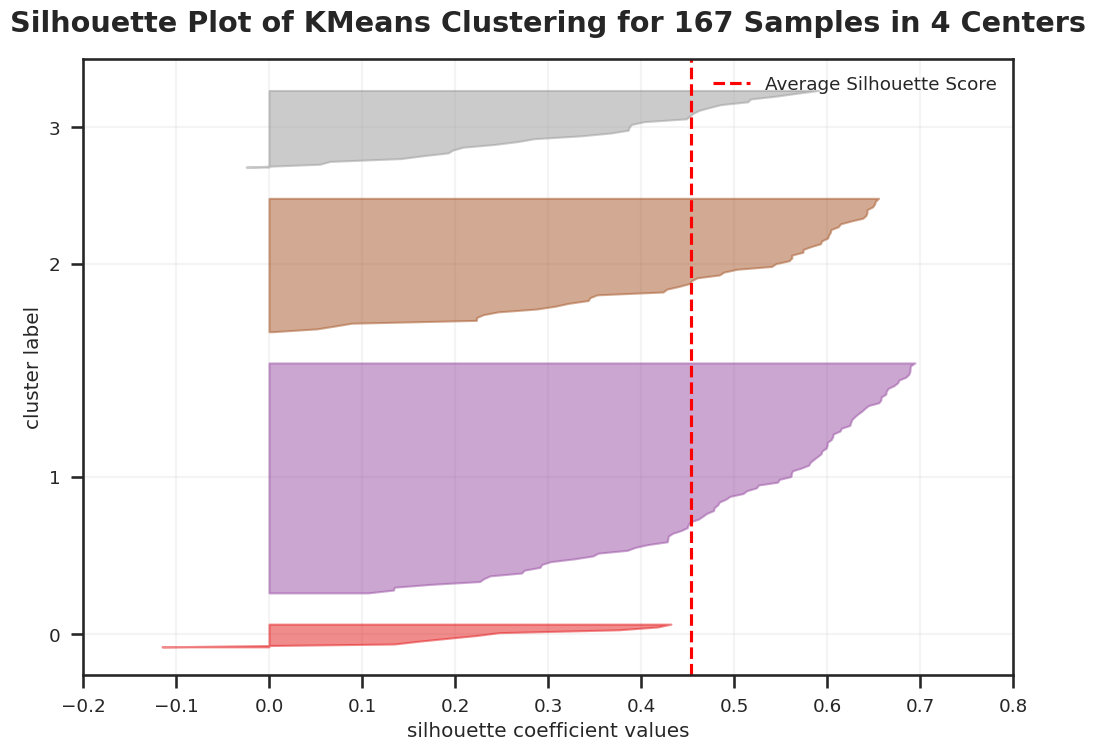

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4, random_state=101))

In [682]:

silhouette_visualizer(kmeans, df_pca.iloc[:,:4])

<Axes: >

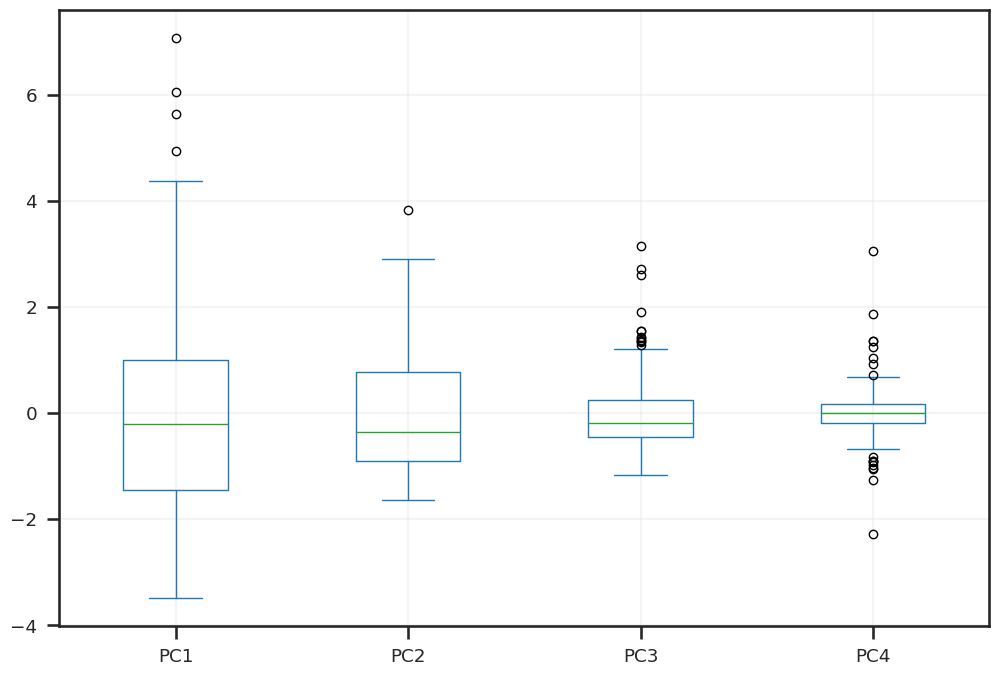

In [683]:
df_pca.iloc[:,:4].plot.box()

In [684]:
px.scatter_3d(df_pca, x="PC1", y="PC2",z="PC3" ,color=labels_pca ,template='plotly_dark')

# Analyzing cluster

##  Using Pca

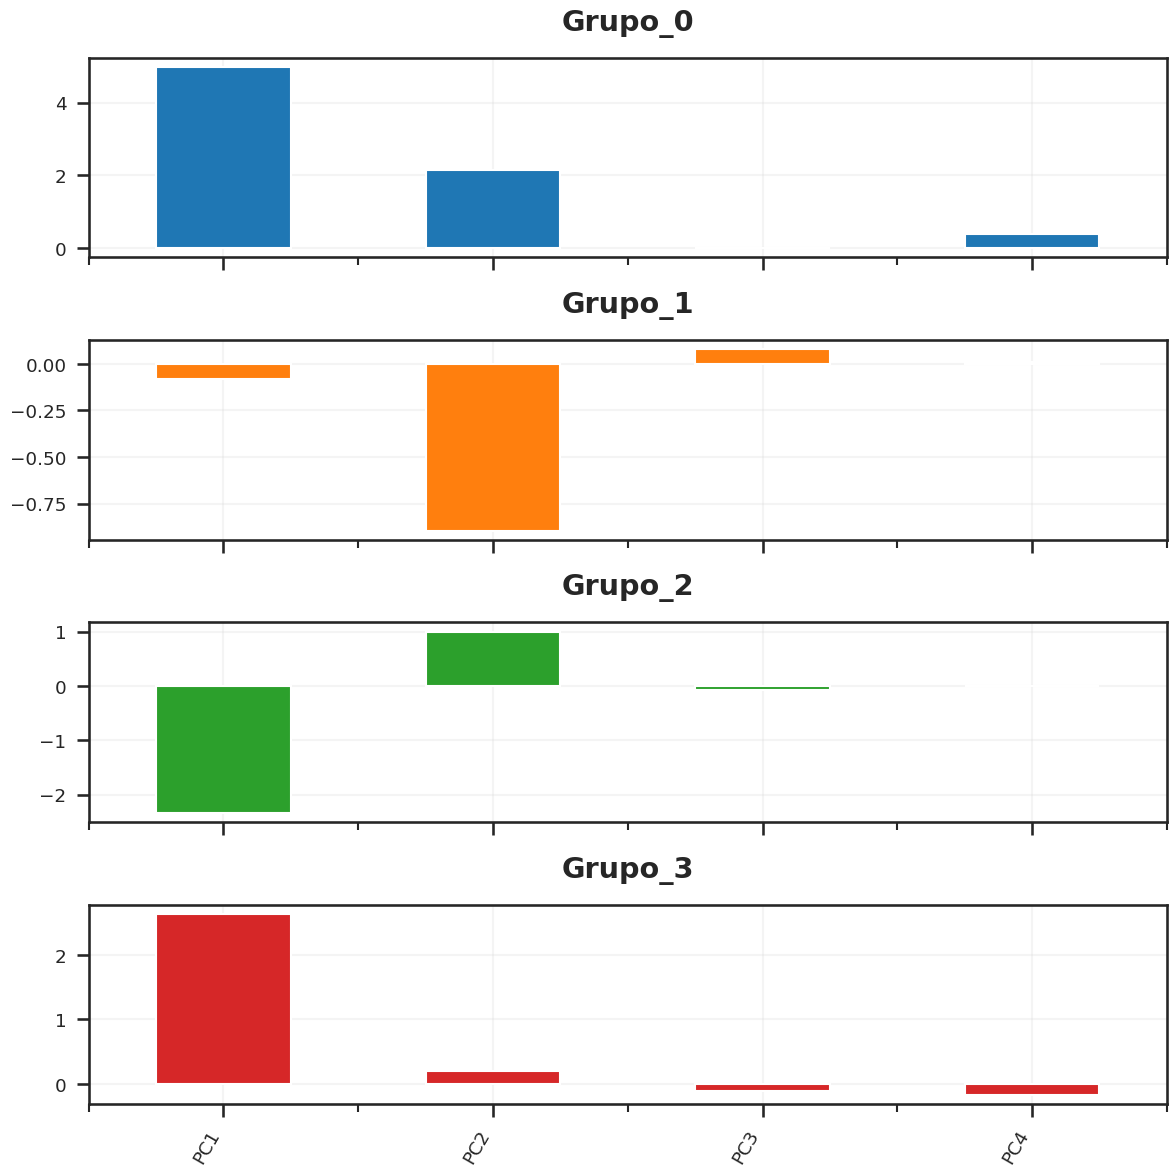

In [685]:
(pd.DataFrame(centers, columns=df_pca.iloc[:,:4].columns)
  .T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [686]:
df_labels_pca=pd.DataFrame(labels_pca)

In [687]:
df_final_pca= pd.concat([df,df_labels_pca], axis=1)

In [688]:
df_final_pca[df_final_pca[0]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.60,527.05,3257.55,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.61,26.80,90.55,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.82,67.20,353.70,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.10,40.63,390.20,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.88,34.68,397.57,1410,3.870,65.9,4.75,769,2


## Kmeans without PCA

In [689]:
cluster_help=df_final[df_final["labels"]==1]
cluster_help

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.60,527.05,3257.55,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.61,26.80,90.55,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.82,67.20,353.70,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.10,40.63,390.20,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.88,34.68,397.57,1410,3.870,65.9,4.75,769,1


## Showing country by social economics problems

In [690]:
cluster_gdpp=(cluster_help[cluster_help["gdpp"]<=800]
              .sort_values(by="gdpp")
              .head(20))

In [691]:
cluster_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,1
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,1
93,Madagascar,62.2,103.25,15.57,177.59,1390,8.79,60.8,4.60,413,1
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,1
94,Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459,1
50,Eritrea,55.2,23.09,12.82,112.31,1420,11.60,61.7,4.61,482,1


Text(0.5, 1.0, 'GDP X Country')

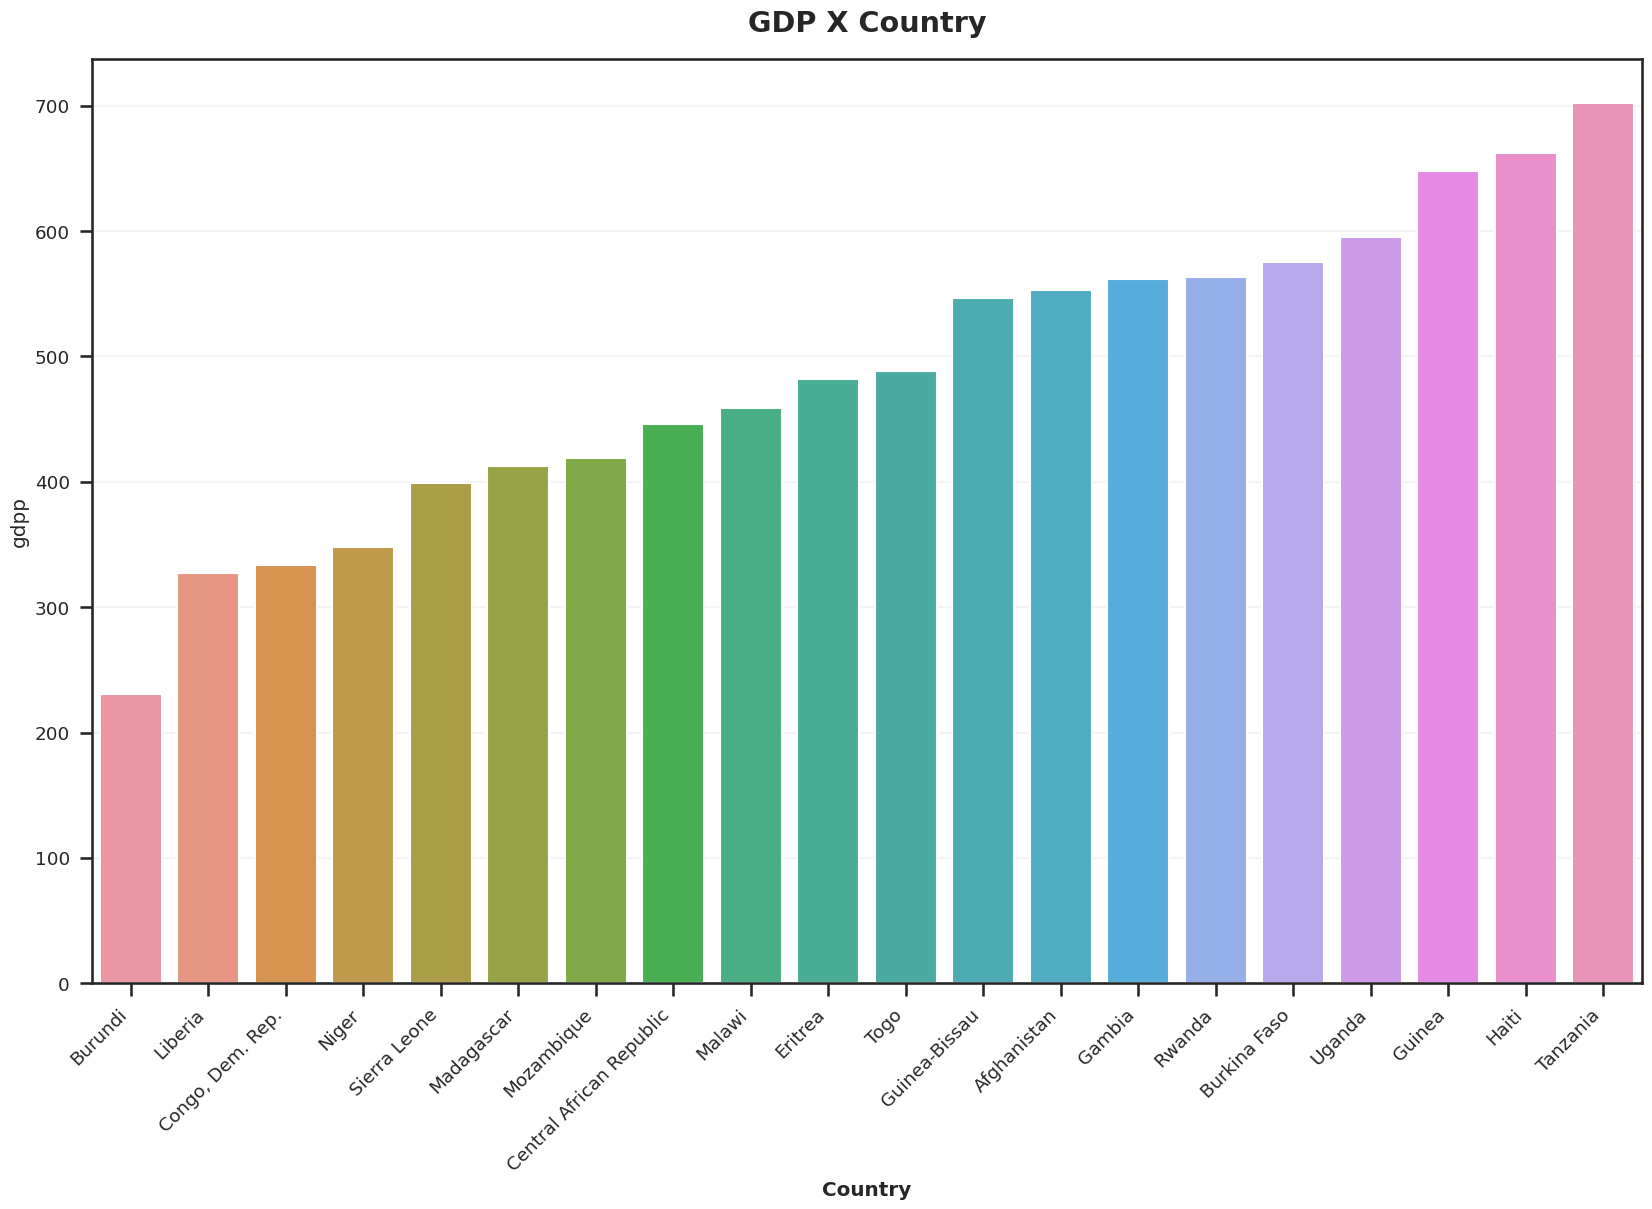

In [692]:
plt.figure(figsize=(20,12))
sns.barplot(data=cluster_gdpp, x="country", y="gdpp")
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("GDP X Country")


In [693]:
cluster_child=(cluster_help[cluster_help["gdpp"]<=800]
               .sort_values(by="child_mort", ascending=False)
               .head(20))

In [694]:
cluster_child

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.29,45.74,428.31,1500,5.450,32.1,3.33,662,1
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.200,55.0,5.20,399,1
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.010,47.5,5.21,446,1
97,Mali,137.0,161.42,35.26,248.51,1870,4.370,59.5,6.55,708,1
112,Niger,123.0,77.26,17.96,170.87,814,2.550,58.8,7.49,348,1
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,1
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.800,57.5,6.54,334,1
64,Guinea-Bissau,114.0,81.50,46.50,192.54,1390,2.970,55.6,5.05,547,1
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,1
63,Guinea,109.0,196.34,31.95,279.94,1190,16.100,58.0,5.34,648,1


Text(0.5, 1.0, 'Child Mort X Country')

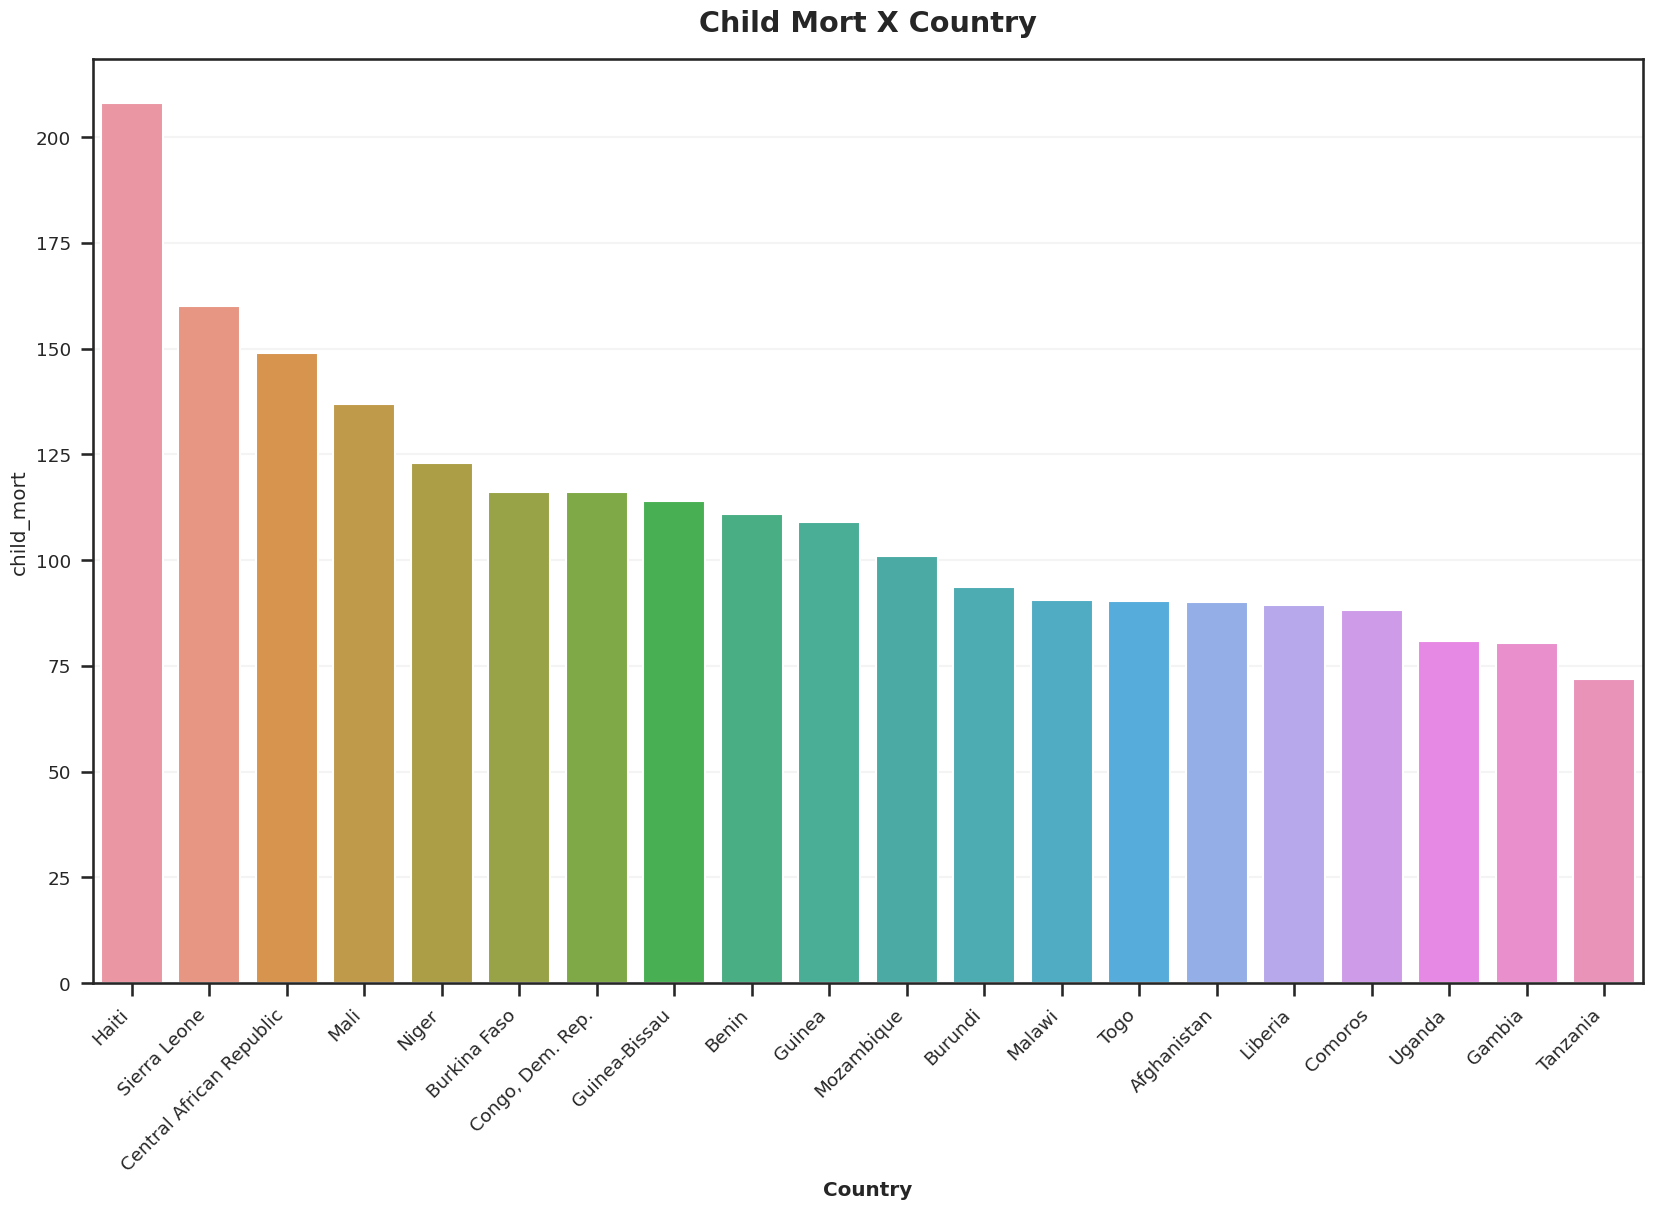

In [695]:
plt.figure(figsize=(20,12))
sns.barplot(data=cluster_child, x="country", y="child_mort")
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("Child Mort X Country")


In [696]:
cluster_income=(cluster_help.sort_values(by="income")
                .head(20))

Text(0.5, 1.0, 'Income X Country')

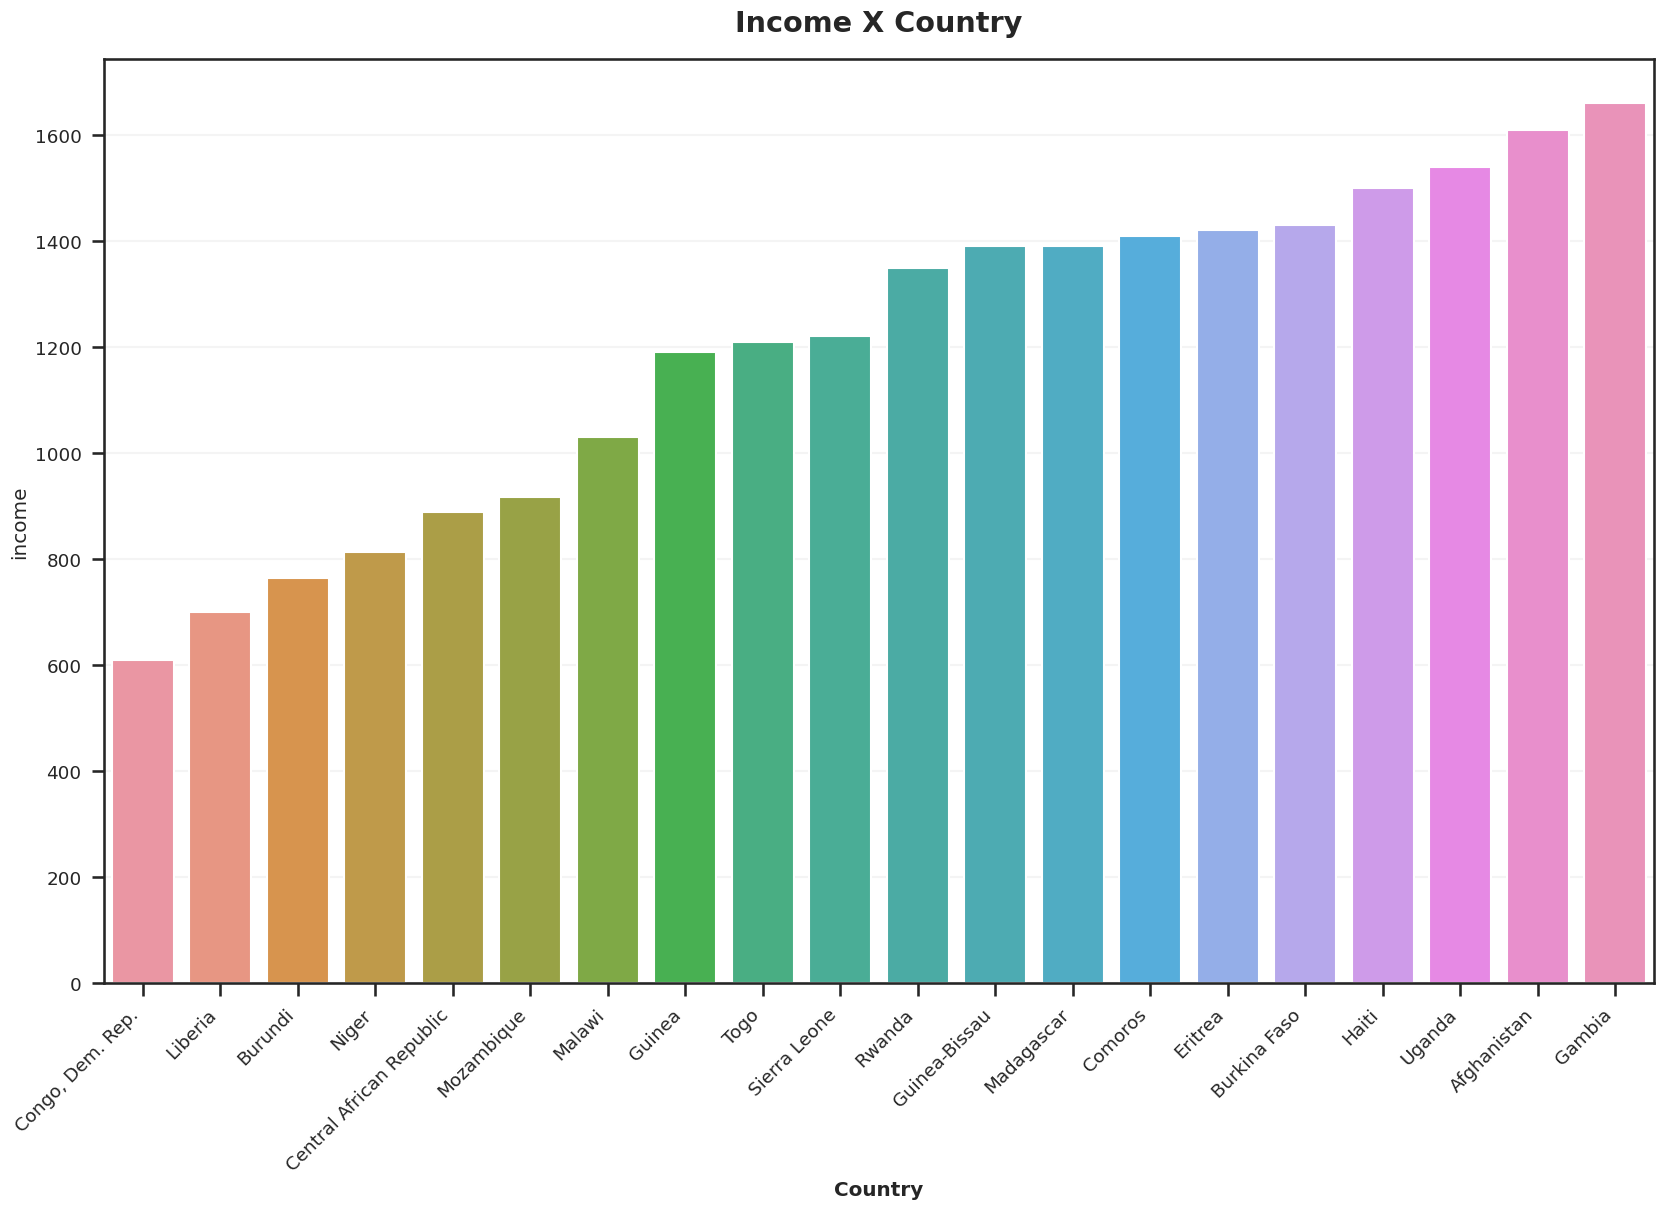

In [697]:
plt.figure(figsize=(20,12))
sns.barplot(data=cluster_income, x="country", y="income")
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("Income X Country")
